## Lab5. Text corpus creation and binary classification using DNN

### R.NEWLIN BLESSY ---225229122

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense

## 1.Dataset Creation

In [2]:
df1 = pd.read_csv("motivational.csv")
df1.head()

,Labels,Quotes,Target
0,1,எப்படி மேலும் அதிகாரமானது அது அதிகாரமானது,1
1,2,நீங்கள் உங்கள் குழுவினை அடைய வேண்டும்,1
2,3,தைரியம் பயத்தை விட ஒரு படி மேலே உள்ளது,1
3,4,சவால்கள் வளர்ச்சிக்கு நேரிட்டு மேம்பாடுகள் ஆகும்,1
4,5,செய்ய முடிந்தவன் சாதிக்கிறான் செய்ய முடியாதவன்...,1


In [3]:
df2 = pd.read_csv("Unmotivational1.csv")

In [4]:
df2.head()

,Labels,Quotes,Target
0,1,நீங்கள் ஒருபோதும் ஒன்றாக இல்லாவிட்டால் உங்கள் ...,0
1,2,வாழ்க்கை மட்டும் பிரயாணம்,0
2,3,வெற்றிக்கான பாதை எப்போதும் கட்டமைக்கப்படுகிறது,0
3,4,நல்ல வேலைக்கான வெகுமதி அதிக உழைப்பு,0
4,5,வாழ்க்கை ஏந்தியது பாத்துக்கோங்க,0


In [5]:
motivational_data=df1
demotivational_data=df2

In [6]:
data = pd.concat([motivational_data, demotivational_data], ignore_index=True)

In [7]:
X = data["Quotes"]
y = data["Target"]

vectorizer = TfidfVectorizer(stop_words=None, max_features=None, analyzer='word')
X_tfidf = vectorizer.fit_transform(X).toarray()

## 2.Pre-Processing

In [8]:
doc1 = "உன்னை யார் ஒரு கைவிட்டாலும் உன் நம்பிக்கை உன்னை கை விடாத (motivational lines)"
doc2 = "சும்மாவாக இருங்கள் மற்றும் வாழ்க்கையில் இந்தவெற்றி பெறுங்கள் (demotivational lines)"

In [9]:
documents = [doc1, doc2]
tamil_stopwords = ["ஒரு", "ஒன்று", "அல்லது", "இந்த", "அது", "இது", ...]

In [10]:
def preprocess_text(text):
    words = text.split()
    return " ".join([word for word in words if word not in tamil_stopwords])

preprocessed_documents = [preprocess_text(doc) for doc in documents]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_documents)
unique_words = vectorizer.get_feature_names_out()

In [11]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=unique_words)
print("TF-IDF Matrix:")
print(tfidf_df)
print("\nUnique Word List:")
print(unique_words)

TF-IDF Matrix:
   demotivational     lines  motivational        இந        இர        உன  \
0        0.000000  0.209755      0.294804  0.000000  0.000000  0.884412   
1        0.324336  0.230768      0.000000  0.324336  0.324336  0.000000   

         கள        தவ        நம        மற  
0  0.000000  0.000000  0.294804  0.000000  
1  0.648673  0.324336  0.000000  0.324336  

Unique Word List:
['demotivational' 'lines' 'motivational' 'இந' 'இர' 'உன' 'கள' 'தவ' 'நம'
 'மற']


## 3.Dataset Preparation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

## 4.Model Creations

In [13]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 471ms/step - loss: 0.6997 - accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6958 - accuracy: 0.4000
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.6920 - accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.4667
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.4667
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.6808 - accuracy: 0.4667
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6771 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6735 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6699 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6664 - accuracy: 0.6000
Epoch 11/100
1/1 [=============

In [15]:
# Step 7: Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.6000000238418579


## 5.Analysis

## A)

In [16]:
import time
import matplotlib.pyplot as plt

In [17]:
nodes_list = [8, 16, 32, 64, 128, 256, 512, 1028]
training_acc = []
testing_acc = []
running_time = []
num_params = []

In [18]:
for num_nodes in nodes_list:
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()
    
    num_params.append(model.count_params())
    training_acc.append(model.evaluate(X_train, y_train, verbose=0)[1])
    testing_acc.append(model.evaluate(X_test, y_test, verbose=0)[1])
    running_time.append(end_time - start_time)

## Parameters, Training, Testing, Running time

Text(0.5, 1.0, 'Number of Parameters vs Number of Nodes')

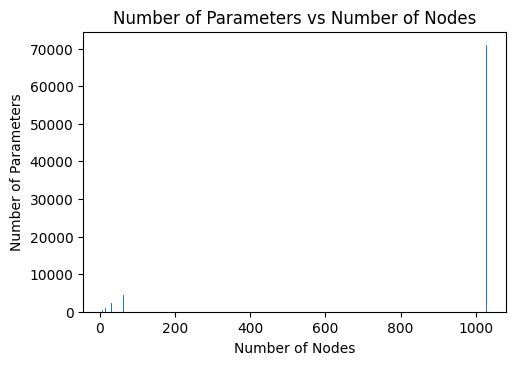

In [19]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(nodes_list, num_params)
plt.xlabel("Number of Nodes")
plt.ylabel("Number of Parameters")
plt.title("Number of Parameters vs Number of Nodes")

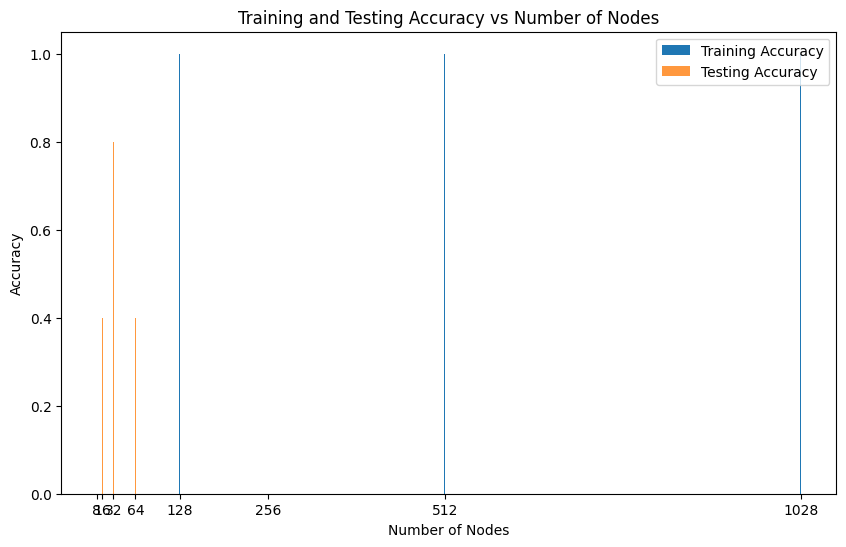

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(nodes_list, training_acc, label="Training Accuracy", width=0.4)
plt.bar(np.array(nodes_list)+0.4, testing_acc, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(nodes_list)+0.2, nodes_list)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Nodes")
plt.legend()

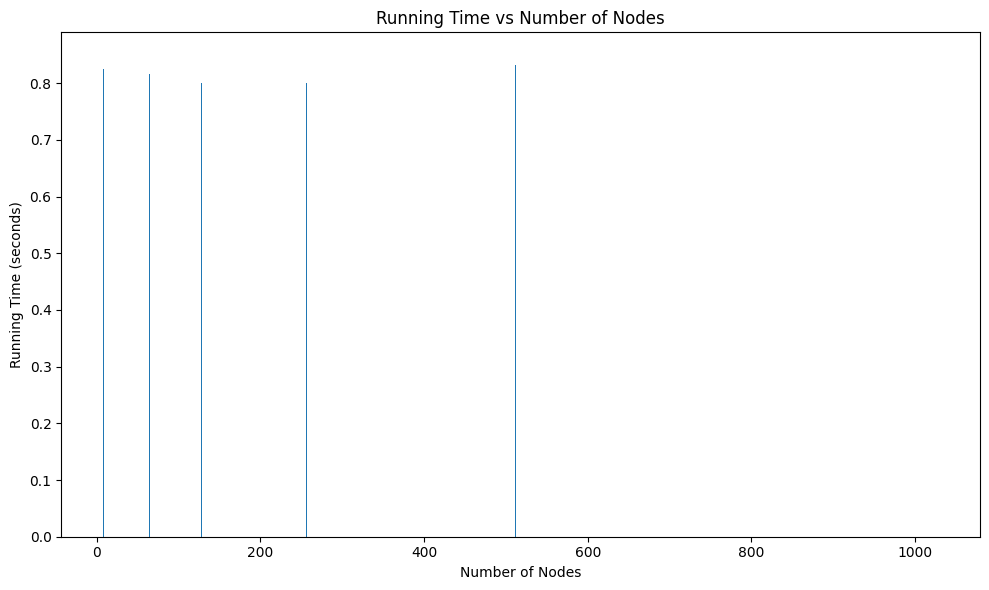

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(nodes_list, running_time)
plt.xlabel("Number of Nodes")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time vs Number of Nodes")

plt.tight_layout()
plt.show()

## B)

In [22]:
num_layers_list = [2, 3, 4, 5]
training_acc_layers = []
testing_acc_layers = []
running_time_layers = []
num_params_layers = []

In [23]:
for num_layers in num_layers_list:
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()
    
    num_params_layers.append(model.count_params())
    training_acc_layers.append(model.evaluate(X_train, y_train, verbose=0)[1])
    testing_acc_layers.append(model.evaluate(X_test, y_test, verbose=0)[1])
    running_time_layers.append(end_time - start_time)

## Parameters, Training, Testing, Running time

Text(0.5, 1.0, 'Number of Parameters vs Number of Layers')

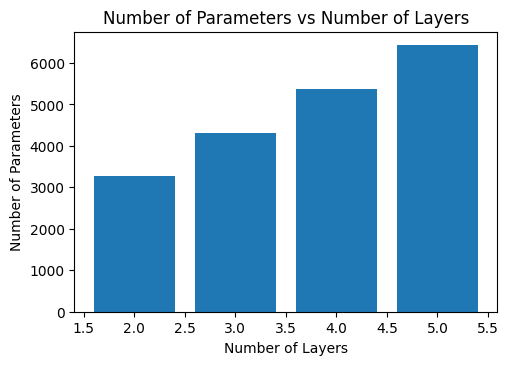

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(num_layers_list, num_params_layers)
plt.xlabel("Number of Layers")
plt.ylabel("Number of Parameters")
plt.title("Number of Parameters vs Number of Layers")

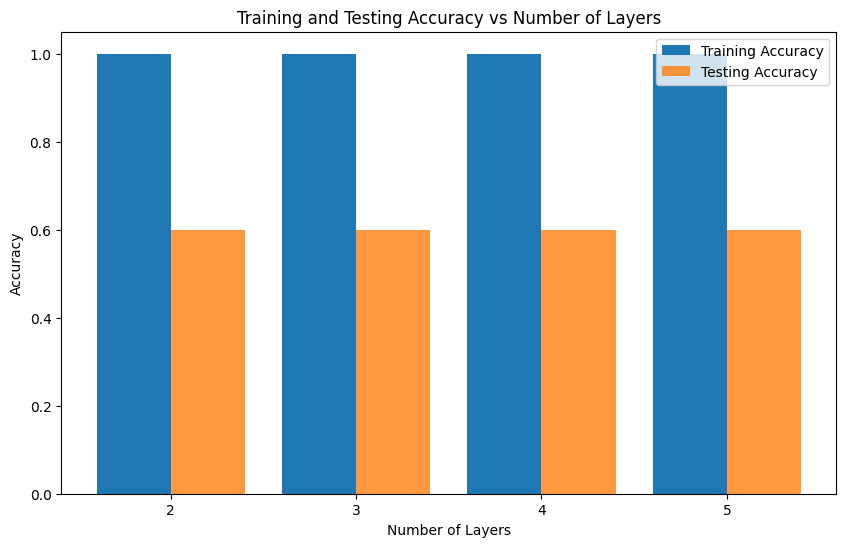

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, training_acc_layers, label="Training Accuracy", width=0.4)
plt.bar(np.array(num_layers_list)+0.4, testing_acc_layers, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(num_layers_list)+0.2, num_layers_list)
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Layers")
plt.legend()

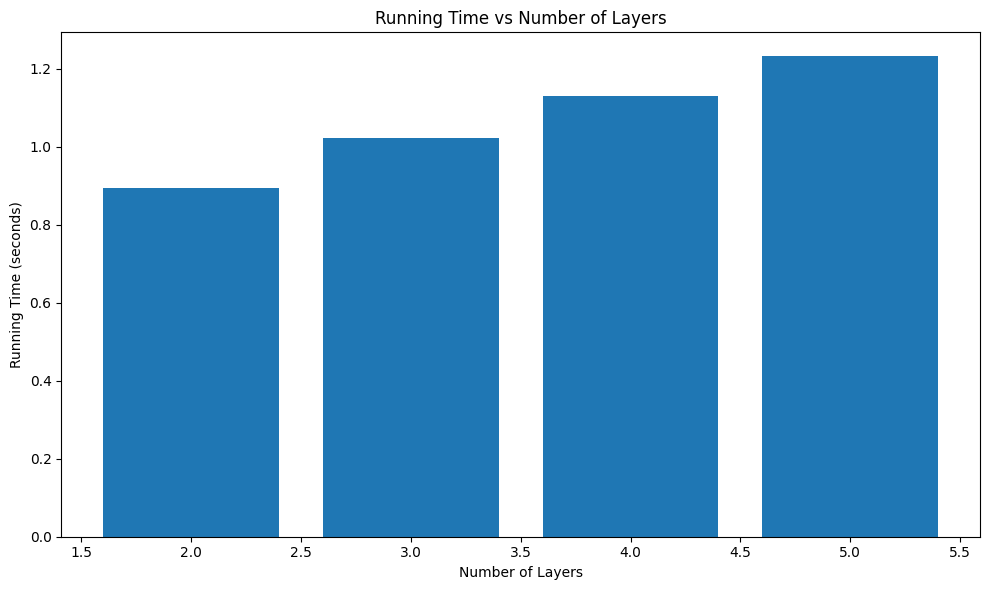

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, running_time_layers)
plt.xlabel("Number of Layers")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time vs Number of Layers")

plt.tight_layout()
plt.show()

## Table

## Initital

In [27]:
index_32_nodes = nodes_list.index(32)
print("CONFIGURATION with 32 Nodes:")
print(f"Number of Nodes: {nodes_list[index_32_nodes]}")
print(f"Number of Layers: {num_layers_list[index_32_nodes]}")
print(f"Number of Parameters: {num_params[index_32_nodes]}")
print(f"Training Accuracy: {training_acc[index_32_nodes]:.4f}")
print(f"Testing Accuracy: {testing_acc[index_32_nodes]:.4f}")
print(f"Running Time: {running_time[index_32_nodes]:.4f} seconds")

CONFIGURATION with 32 Nodes:
Number of Nodes: 32
Number of Layers: 4
Number of Parameters: 2209
Training Accuracy: 1.0000
Testing Accuracy: 0.8000
Running Time: 0.8313 seconds


## Model Improvement-I

In [28]:
# Nodes configurations of interest
nodes_of_interest = [8, 16, 32, 64, 128, 256, 512, 1028]

# Find the indices of the nodes configurations of interest
indices_of_interest = [nodes_list.index(node) for node in nodes_of_interest]

# Print the details for each nodes configuration of interest
print("{:<10} {:<18} {:<18} {:<15} {:<18}".format("Nodes", "Training Accuracy", "Testing Accuracy", "Parameters", "Running Time"))
for i in indices_of_interest:
    nodes = nodes_list[i]
    params = num_params[i]
    train_acc = training_acc[i]
    test_acc = testing_acc[i]
    time_taken = running_time[i]
    print("{:<10} {:<18.4f} {:<18.4f} {:<15} {:<18.4f}".format(nodes, train_acc, test_acc, params, time_taken))

Nodes      Training Accuracy  Testing Accuracy   Parameters      Running Time      
8          1.0000             0.2000             553             0.8257            
16         1.0000             0.4000             1105            0.8105            
32         1.0000             0.8000             2209            0.8313            
64         1.0000             0.4000             4417            0.8161            
128        1.0000             0.6000             8833            0.8005            
256        1.0000             0.6000             17665           0.8000            
512        1.0000             0.6000             35329           0.8327            
1028       1.0000             0.6000             70933           0.8473            


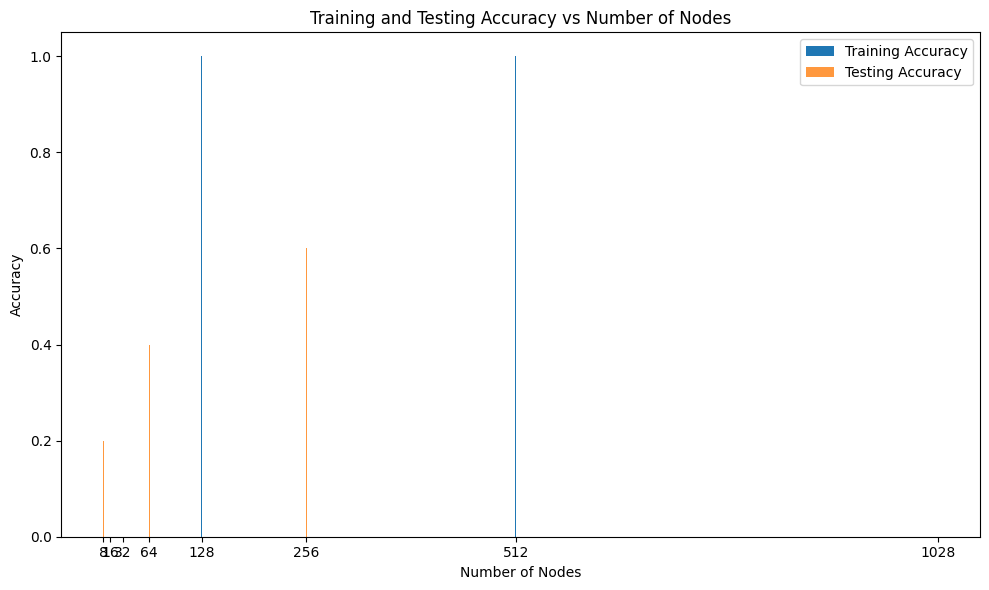

In [29]:
nodes_of_interest = [8, 16, 32, 64, 128, 256, 512, 1028]
indices_of_interest = [nodes_list.index(node) for node in nodes_of_interest]

plt.figure(figsize=(10, 6))
plt.bar(nodes_list, training_acc, label="Training Accuracy", width=0.4)
plt.bar(np.array(nodes_list)+0.4, testing_acc, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(nodes_list)+0.2, nodes_list)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Nodes")
plt.legend()
plt.tight_layout()
plt.show()

## Model Improvement-II

In [30]:
layers_of_interest = [2, 3, 4, 5]

indices_of_interest_layers = [num_layers_list.index(layers) for layers in layers_of_interest]

print("{:<10} {:<18} {:<18} {:<15} {:<18}".format("Layers", "Training Accuracy", "Testing Accuracy", "Parameters", "Running Time"))
for i in indices_of_interest_layers:
    layers = num_layers_list[i]
    params = num_params_layers[i]
    train_acc = training_acc_layers[i]
    test_acc = testing_acc_layers[i]
    time_taken = running_time_layers[i]
    print("{:<10} {:<18.4f} {:<18.4f} {:<15} {:<18.4f}".format(layers, train_acc, test_acc, params, time_taken))

Layers     Training Accuracy  Testing Accuracy   Parameters      Running Time      
2          1.0000             0.6000             3265            0.8950            
3          1.0000             0.6000             4321            1.0221            
4          1.0000             0.6000             5377            1.1304            
5          1.0000             0.6000             6433            1.2319            


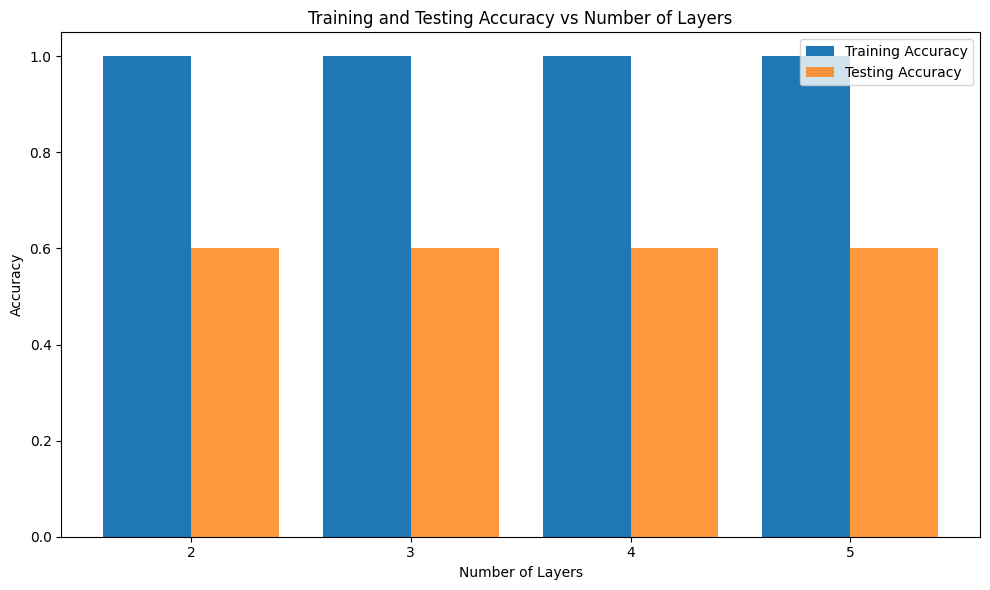

In [31]:
layers_of_interest = [2, 3, 4, 5]
indices_of_interest_layers = [num_layers_list.index(layers) for layers in layers_of_interest]

plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, training_acc_layers, label="Training Accuracy", width=0.4)
plt.bar(np.array(num_layers_list)+0.4, testing_acc_layers, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(num_layers_list)+0.2, num_layers_list)
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Layers")
plt.legend()
plt.tight_layout()
plt.show()

## Best configuration

In [35]:
# Print and plot the results for nodes
best_index_nodes = np.argmax(testing_acc)
best_config_nodes = nodes_list[best_index_nodes]
best_config_params = num_params[best_index_nodes]
best_config_train_acc_nodes = training_acc[best_index_nodes]
best_config_test_acc_nodes = testing_acc[best_index_nodes]
best_config_running_time_nodes = running_time[best_index_nodes]

# Print and plot the results for layers
best_index_layers = np.argmax(testing_acc_layers)
best_config_layers = num_layers_list[best_index_layers]
best_config_params_layers = num_params_layers[best_index_layers]
best_config_train_acc_layers = training_acc_layers[best_index_layers]
best_config_test_acc_layers = testing_acc_layers[best_index_layers]
best_config_running_time_layers = running_time_layers[best_index_layers]

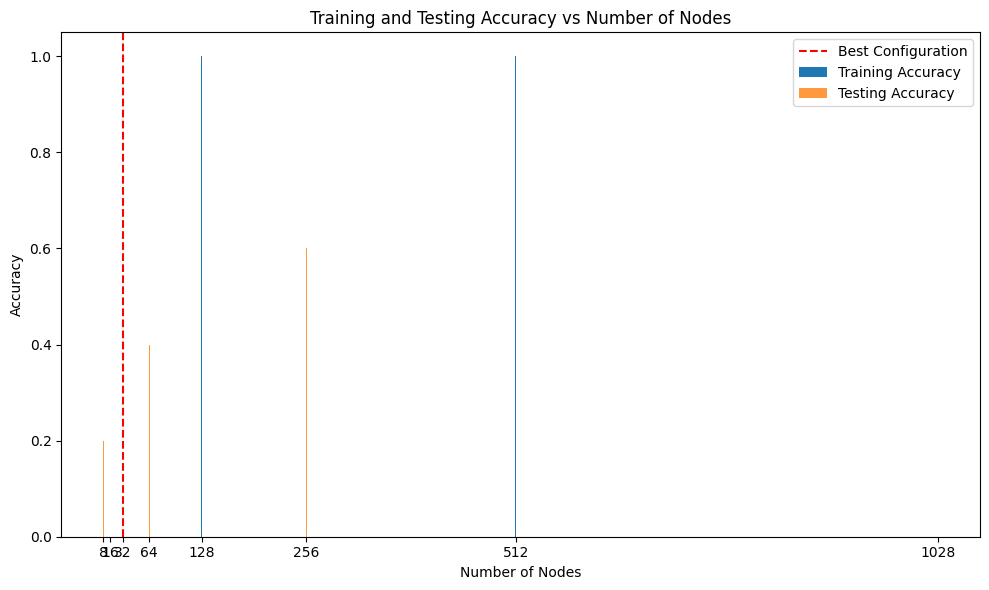

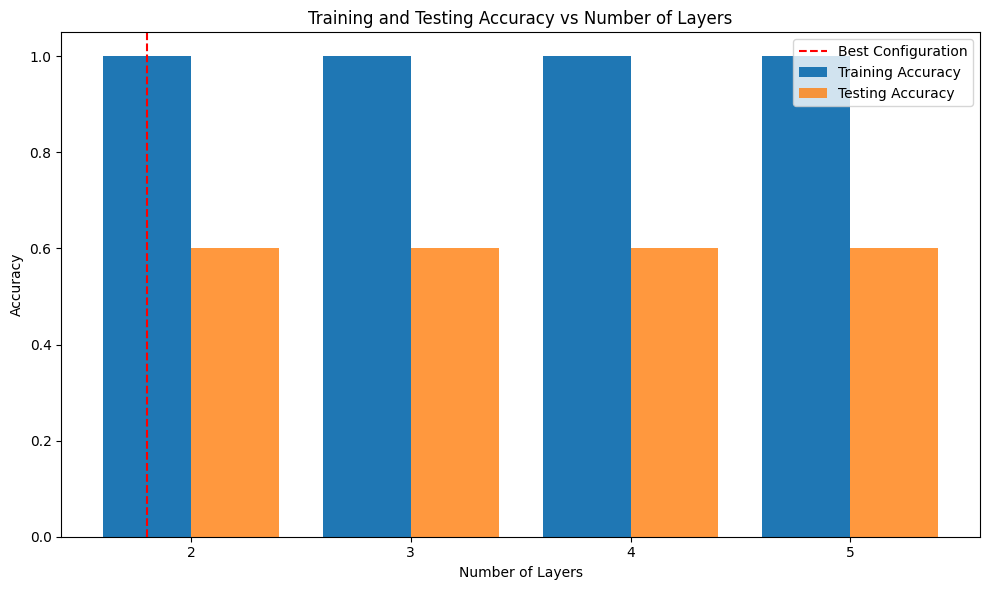

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(nodes_list, training_acc, label="Training Accuracy", width=0.4)
plt.bar(np.array(nodes_list)+0.4, testing_acc, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.axvline(x=best_config_nodes, color='r', linestyle='--', label='Best Configuration')
plt.xticks(np.array(nodes_list)+0.2, nodes_list)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Nodes")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, training_acc_layers, label="Training Accuracy", width=0.4)
plt.bar(np.array(num_layers_list)+0.4, testing_acc_layers, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.axvline(x=best_config_layers, color='r', linestyle='--', label='Best Configuration')
plt.xticks(np.array(num_layers_list)+0.2, num_layers_list)
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Layers")
plt.legend()
plt.tight_layout()
plt.show()